In [7]:
import matplotlib.pyplot as plt

# YOLO 

En aquesta sessió descobrirem un dels models de l'estat de l'art (SOTA) de l'Aprenentatge Automàtic.

You Only Look Once: Unified, Real-Time Object Detection. [article](https://arxiv.org/pdf/1506.02640) ; [presentació](https://www.youtube.com/watch?v=NM6lrxy0bxs&pp=ygUkeW91IG9ubHkgbG9vayBvbmNlIHByZXNlbnRhdGlvbiBjdnBy)

YOLO (You Only Look Once) és una arquitectura de xarxa neuronal profunda inicialment dissenyada per a la detecció d'objectes en imatges en temps real. A diferència d'altres enfocaments que processen les imatges en diverses etapes com per exemple la família R-CNN. YOLO adopta un enfocament unificat: divideix la imatge en una quadrícula i processa cada cel·la simultàniament per predir les bounding boxes i les classes dels objectes presents. Aquesta integració permet assolir una velocitat notable sense comprometre significativament la precisió. A més, gràcies al seu disseny optimitzat, YOLO ha estat modificada i adaptada per realitzar múltiples tasques relacionades amb la visió per computador. Actualment pot: classificar, detectar, segmentar, seguiment d'objectes a vídeo, seguiment dels moviments del cos.

### YOLO: Una breu història

- **YOLO (You Only Look Once)**, un model popular de detecció d'objectes i segmentació d'imatges, va ser desenvolupat per Joseph Redmon i Ali Farhadi a la Universitat de Washington. Llançat el 2015, YOLO va guanyar ràpidament popularitat per la seva alta velocitat i precisió.
- **YOLOv2**, llançat el 2016, va millorar el model original incorporant _batch normalization_ i  _anchor boxes_.
- **YOLOv3**, llançat el 2018, va millorar encara més el rendiment del model mitjançant un _backbone_ més eficient, múltiples  _anchor boxes_ i agrupació de piràmides espacials (objectes de múltiples mides).
- **YOLOv4** es va llançar el 2020, introduint innovacions com l'augment de dades emprant mosaics, un nou capçal (_head_) de detecció i una nova funció de pèrdua.
- **YOLOv5** va millorar encara més el rendiment del model i va afegir noves funcions com ara l'optimització d'hiperparàmetres, el seguiment d'experiments integrat i l'exportació automàtica a formats d'exportació populars. [**Controvèrsia!!**](https://blog.roboflow.com/yolov4-versus-yolov5/)
- **YOLOv6** va ser de codi obert per [Meituan](https://github.com/meituan/YOLOv6) el 2022 i s'utilitza en molts dels robots de lliurament autònoms de la companyia.
- **YOLOv7** va afegir tasques addicionals, com ara l'estimació de poses (_pose estimation_) al conjunt de dades de punts clau COCO.
- **YOLOv8** Es basa en l'èxit de les versions anteriors, introduint noves funcions i millores per millorar el rendiment, la flexibilitat i l'eficiència. YOLOv8 admet una gamma completa de tasques d'IA de visió, com ara detecció, segmentació, estimació de poses, seguiment i classificació. Aquesta versatilitat permet als usuaris aprofitar les capacitats de YOLOv8 en diferents aplicacions i dominis. --> Propaganda Ultralytics ^^.
- **YOLOv9**, **YOLOv10**, **YOLOv11** : Successives millores en la xarxa, sobretot enfocades a mantenir les seves capacitats reduïnt la seva mida.

Per començar i fer les primeres proves es recomana usar la versió 5, a que té un bon equilibri entre dificultat (complicacions d'ús) i els resultats que podem obtenir.


## Arquitectura

La xarxa té 24 capes convolucionals seguides de 2 capes completament connectades. En lloc dels mòduls inicials utilitzats per [GoogLeNet](https://arxiv.org/pdf/1409.4842), per reduir el mapes d'activació s'utilitzen capes convolucionals 1×1 seguides de capes convolucionals de 3×3.

![YOLO](img/YOLO.png "YOLO")


### Detecció unificada

A diferència de les xarxes que provenen de R-CNN a l'article s'explica:

> Unifiquem els components separats de la detecció d'objectes en una única xarxa neuronal. La nostra xarxa utilitza funcions
de tota la imatge per predir cada quadre delimitador. També prediu tots els quadres delimitadors (_bounding boxes_) de totes les classes per a una imatge simultàniament. Això vol dir que la nostra xarxa raona globalment sobre la imatge completa i tots els objectes de la imatge.

El sistema YOLO divideix la imatge d'entrada en una graella $S×S$. Si el centre d'un objecte cau dins d'una cel·la de quadrícula, aquesta cel·la de quadrícula s'encarrega de detectar aquest objecte. Cada cel·la de la quadrícula prediu $B$ quadres de delimitació i els valors de confiança per a aquestes caixes. 

Aquestes puntuacions de confiança reflecteixen la confiança que té el model que la caixa conté un objecte i també la precisió que creu que és la caixa que prediu. Cada quadre delimitador consta de 5 prediccions: $x, y, w, h$ i la confiança. Les coordenades $(x, y)$ representen el centre del quadre en relació amb els límits de la cel·la de la quadrícula. L'amplada i l'alçada es prediuen en relació amb tota la imatge. Finalment, la predicció de confiança representa l'IOU entre la caixa predita i qualsevol caixa de veritat terrestre. Cada cel·la de la quadrícula també prediu probabilitats de classe condicional $C$.


![YOLO](img/YOLO_deteccio.png "YOLO")

L'arquitectura que hem mostrat anteriorment té una capa de sortida de $7x7x30$ degut a que  la sortida és correspon amb la següentv fórmula: $S × S × (B ∗ 5 + C)$ en el cas de l'article original: $S=7$, $B=2$ i $C=20$ ja que es va entrenar amb el dataset [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/).

Actualment l'arquitectura de la xarxa és molt més complexa, i inclou 3 blocs molt diferenciats:

- **Columna** "Backbone": Bàsicament és una xarxa convolucional que extreu característiques. A partir de la versió 3 creen la seva pròpia xarxa anomenada DarkNet, un model amb connexions residuals que té al voltant de 53 capes.
- **Coll**: Aquesta part connecta la columna i el/els caps. S'encarrega entre d'altres coses de la detecció d'objectes a múltiples escales mitjançant xarxes piramidals que reben informació de diversos punts del "Backbone.
- **Cap**: El cap/caps s'encarrega de fer prediccions. En les versions modernes de YOLO s'utilitzen múltiples mòduls de detecció que prediuen quadres delimitadors, puntuacions d'objectivitat i probabilitats de classe per a cada cel·la de quadrícula del mapa de característiques. A continuació, aquestes prediccions s'agreguen per obtenir les deteccions finals.

Podem veure un exemple d'aquesta complexa arquitectura en el següent enllaç a la documentació oficial de la [YOLO v5](https://docs.ultralytics.com/yolov5/tutorials/architecture_description/#1-model-structure).

## Ús de la xarxa

La manera més senzilla d'emprar la xarxa és desde la llibreria que la empresa Ultralytics ens ofereix. D'aquesta manera ens és molt senzill poder provar les diferents versions de la xarxa i també realitzar els processos de _fine tunning_ o de _transfer learning_.

In [9]:
!pip install -U ultralytics

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


Començarem fent proves amb la YoloV5 que presenta 5 versions diferents, cada una d'aquestes versions té una xarxa _backbone_ de mida diferent, a més tenim 2 mides d'entrada d'imatges:

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>size<br><sup>(pixels)</sup></th>
      <th>mAP<sup>val<br>50-95</sup></th>
      <th>mAP<sup>val<br>50</sup></th>
      <th>Speed<br><sup>CPU b1<br>(ms)</sup></th>
      <th>Speed<br><sup>V100 b1<br>(ms)</sup></th>
      <th>Speed<br><sup>V100 b32<br>(ms)</sup></th>
      <th>params<br><sup>(M)</sup></th>
      <th>FLOPs<br><sup>@640 (B)</sup></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5n.pt" target="_blank">YOLOv5n</a></td>
      <td>640</td>
      <td>28.0</td>
      <td>45.7</td>
      <td><strong>45</strong></td>
      <td><strong>6.3</strong></td>
      <td><strong>0.6</strong></td>
      <td><strong>1.9</strong></td>
      <td><strong>4.5</strong></td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt" target="_blank">YOLOv5s</a></td>
      <td>640</td>
      <td>37.4</td>
      <td>56.8</td>
      <td>98</td>
      <td>6.4</td>
      <td>0.9</td>
      <td>7.2</td>
      <td>16.5</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m.pt" target="_blank">YOLOv5m</a></td>
      <td>640</td>
      <td>45.4</td>
      <td>64.1</td>
      <td>224</td>
      <td>8.2</td>
      <td>1.7</td>
      <td>21.2</td>
      <td>49.0</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l.pt" target="_blank">YOLOv5l</a></td>
      <td>640</td>
      <td>49.0</td>
      <td>67.3</td>
      <td>430</td>
      <td>10.1</td>
      <td>2.7</td>
      <td>46.5</td>
      <td>109.1</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt" target="_blank">YOLOv5x</a></td>
      <td>640</td>
      <td>50.7</td>
      <td>68.9</td>
      <td>766</td>
      <td>12.1</td>
      <td>4.8</td>
      <td>86.7</td>
      <td>205.7</td>
    </tr>
    <tr>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5n6.pt" target="_blank">YOLOv5n6</a></td>
      <td>1280</td>
      <td>36.0</td>
      <td>54.4</td>
      <td>153</td>
      <td>8.1</td>
      <td>2.1</td>
      <td>3.2</td>
      <td>4.6</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s6.pt" target="_blank">YOLOv5s6</a></td>
      <td>1280</td>
      <td>44.8</td>
      <td>63.7</td>
      <td>385</td>
      <td>8.2</td>
      <td>3.6</td>
      <td>12.6</td>
      <td>16.8</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m6.pt" target="_blank">YOLOv5m6</a></td>
      <td>1280</td>
      <td>51.3</td>
      <td>69.3</td>
      <td>887</td>
      <td>11.1</td>
      <td>6.8</td>
      <td>35.7</td>
      <td>50.0</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l6.pt" target="_blank">YOLOv5l6</a></td>
      <td>1280</td>
      <td>53.7</td>
      <td>71.3</td>
      <td>1784</td>
      <td>15.8</td>
      <td>10.5</td>
      <td>76.8</td>
      <td>111.4</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x6.pt" target="_blank">YOLOv5x6</a><br>+ [TTA]</td>
      <td>1280<br>1536</td>
      <td>55.0<br><strong>55.8</strong></td>
      <td>72.7<br><strong>72.7</strong></td>
      <td>3136<br>-</td>
      <td>26.2<br>-</td>
      <td>19.4<br>-</td>
      <td>140.7<br>-</td>
      <td>209.8<br>-</td>
    </tr>
  </tbody>
</table>

Explicació mètrica [mAP](https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173)

Nosaltres començarem fent proves amb la versió més petita:

In [2]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv5n model
model = YOLO("yolov5n.pt")

# Display model information (optional)
model.info()

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

YOLOv5n summary: 262 layers, 2,654,816 parameters, 0 gradients, 7.8 GFLOPs


(262, 2654816, 0, 7.840102399999999)

In [7]:
model;

### Inferència

YOLOv5 ha estat entrenat amb el dataset COCO (Common Objects in COntext) [enllaç](https://cocodataset.org/#home) que en té 80 classes diferents. Fer la inferència per detecció és molt senzill, és suficient amb cridar al model. Aquest ens retorna un objecte de tipus _Results_. [Documentació](https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Results).

Així, el procés d'inferència empra l'API d'Ultralytics i es fa enfora de _Pytorch_. 

In [4]:
# Accepta URL, path, PIL, OpenCV, numpy o una llista
img = "./realYolo.jpeg"

In [20]:
# Inferencia
results = model(img)
img = results# És una llista de Results



0: 640x544 3 persons, 59.0ms
Speed: 2.3ms preprocess, 59.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 544)


#### Exercici

Carrega una foto emprant la llibreria OpenCV (_cv2_) o la llibreria PIL, fes una predicció i mostra les caixes que envolten els objectes detectats.

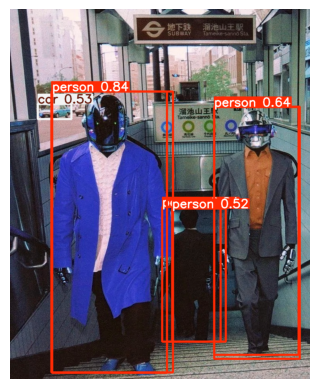

In [22]:
img = results[0].plot()

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

### Entrenament

Per realitzar l'entrenament s'empra el mètode `train` de la classe `YOLO`. No s'ha de realitzar cap bucle d'entrenament, sino que aquesta funció ens proporciona un nivell d'abstracció superior. És necessari especificar que aquest mètode és altament parametritzable i es fa necessari un estudi del mateix abans d'iniciar un entrenament.

Consulta la documentació [enllaç](https://docs.ultralytics.com/modes/train/#key-features-of-train-mode)

In [ ]:
## Copiat de la documentació oficial
from ultralytics import YOLO

# Load a COCO-pretrained YOLO model
model = YOLO("yolov5n.pt") # també es pot carregar un model sense pre entrenar. Es troben en fitxers .yaml

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=100, imgsz=640) #NOTA: Aquí podem entrenar ja que coco8 "es troba dins ultralytics"

# Run inference
results = model("path/to/imatge.jpg")

### Segmentació amb YOLO

Encara que modificant la versió 5 es poden realitzar tasques de segmentació (veure [enllaç](https://github.com/ultralytics/yolov5/blob/master/segment/tutorial.ipynb)), és a partir de la versió 8 que aquesta tasca s'integra dins la xarxa amb l'incorporació d'un nou cap per aquesta tasca.

A la documentació podem veure com ja tenim versions de tots els fitxers amb pesos per les diferents tasques: [enllaç](https://docs.ultralytics.com/models/yolov8/#supported-tasks-and-modes).

A continuació veurem un exemple de segmentació:

In [12]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n-seg.pt")

results_seg = model(img)


image 1/1 /Users/jordi/Documents/GitHub/aa_24/14_YOLO/realYolo.jpeg: 640x544 3 persons, 2 cars, 46.5ms
Speed: 1.4ms preprocess, 46.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


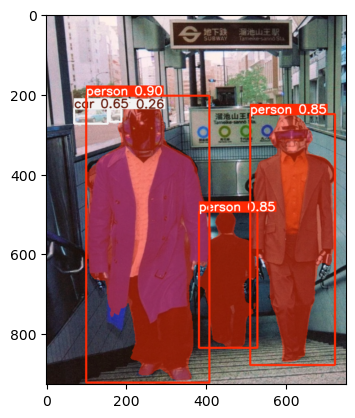

In [13]:
img_result = results_seg[0].plot()

plt.figure()
plt.imshow(img_result);
plt.show();

#### Exercici

En la imatge anterior tenim tant les capses de detecció com les segmentacions:
1. Es demana que mostreu només la segmentació de la persona amb major valor de confiança de la xarxa.
2. Es demana que mostreu per pantalla les coordenades de la capsa de detecció de la corbata.

In [14]:
import cv2
import numpy as np

# Filtrar detecciones para obtener solo las personas
person_detections = [det for det in results_seg[0].boxes if det.cls == 0]

# Seleccionar la detección de persona con mayor confianza
if person_detections:
    best_person = max(person_detections, key=lambda det: det.conf)
    best_person_index = person_detections.index(best_person)

    # Obtener la máscara de segmentación
    mask = results_seg[0].masks.data[best_person_index].cpu().numpy()

    # Convertir la máscara a un formato visualizable (escala de grises o binaria)
    mask = (mask * 255).astype(np.uint8)  # Escalar los valores a 0-255 para visualización

    # Crear una imagen en color para superponer la máscara
    img_with_mask = img.copy()
    if len(img_with_mask.shape) == 2:  # Si es una imagen en escala de grises, convertir a BGR
        img_with_mask = cv2.cvtColor(img_with_mask, cv2.COLOR_GRAY2BGR)

    # Aplicar la máscara a la imagen original
    color = (0, 255, 0)  # Color verde para la máscara
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_with_mask, contours, -1, color, 3)  # Dibujar los contornos de la máscara

    # Mostrar la imagen con OpenCV
    cv2.imshow("Segmentación de Persona con Mayor Confianza", img_with_mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No se detectaron personas en la imagen.")


AttributeError: 'str' object has no attribute 'copy'